In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read the CSV files into DataFrames
rossmann_store = pd.read_csv('Rossmann_store.csv')
rossmann_train = pd.read_csv('Rossmann_train.csv', dtype={'StateHoliday': str})

In [7]:
print("\nRossman Train Data:")
rossmann_train.head()


Rossman Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
print("\nRossmann Store Data:")
rossmann_store.head()


Rossmann Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
rossmann_train.shape

(1017209, 9)

In [10]:
rossmann_store.shape

(1115, 10)

In [11]:
rossmann_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
rossmann_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
rossmann_store = rossmann_store.dropna()

In [62]:
rossmann_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1104,1105,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [14]:
# Data Integration
# Merge "rossmann_train" and "rossmann_store" DataFrames
df_rossman = pd.merge(rossmann_train, rossmann_store, on='Store', how='inner')

# Convert Date to datetime format and Create a new column with the name of the day
df_rossman['Date'] = pd.to_datetime(df_rossman['Date']) 
df_rossman['DayOfWeekName'] = df_rossman['Date'].dt.day_name()

# Drop the 'DayOfWeek' column 
df_rossman.drop(columns=['DayOfWeek'], inplace=True)

In [15]:
# Display the first few rows of the merged_data DataFrame to verify the changes
df_rossman.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
0,2,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday
1,2,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday
2,2,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday
3,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday
4,2,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday


In [63]:
df_rossman

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
0,2,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday
1,2,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday
2,2,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday
3,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday
4,2,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324321,1111,2013-01-05,3325,291,1,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Saturday
324322,1111,2013-01-04,4640,453,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Friday
324323,1111,2013-01-03,4579,444,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Thursday
324324,1111,2013-01-02,5097,505,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Wednesday


In [16]:
df_rossman.shape

(324326, 18)

In [17]:
df_rossman.isnull().sum()

Store                        0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeekName                0
dtype: int64

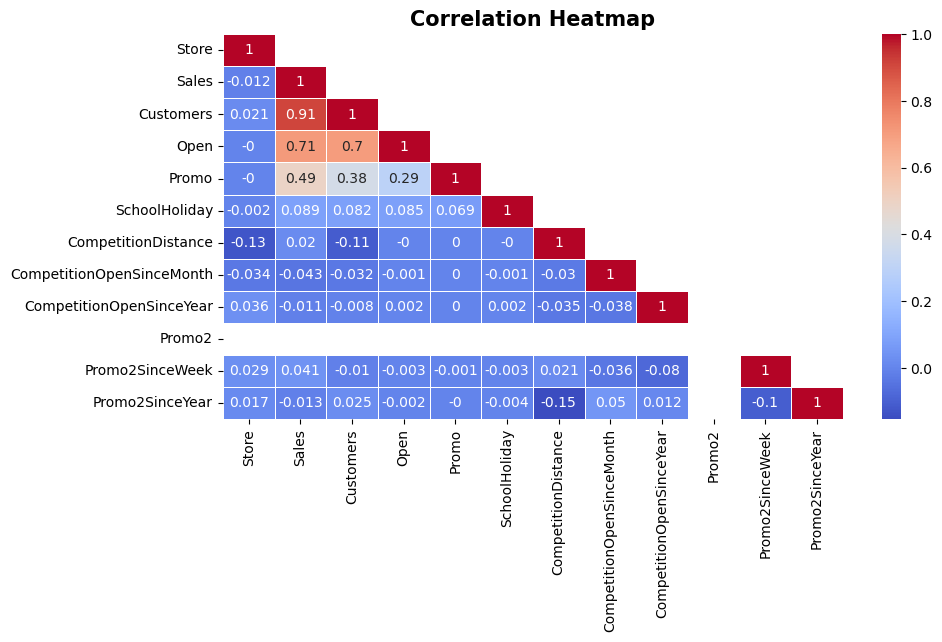

In [18]:
# Calculate the correlation table
corr = df_rossman.corr().round(3) 
# Create a mask to exclude the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot=True, mask=mask, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)
plt.show()

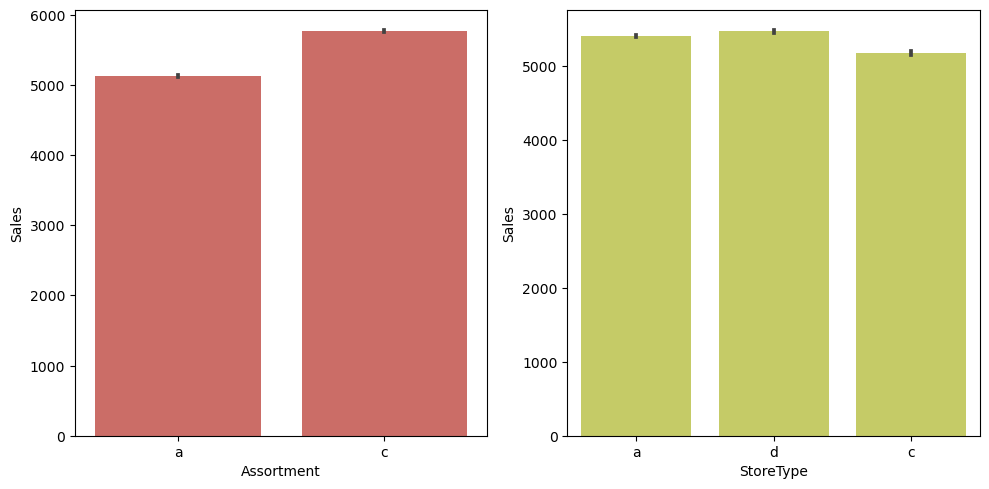

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='Assortment',y='Sales', color=sns.color_palette('hls')[0])
plt.xlabel('Assortment')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='StoreType', y='Sales', color=sns.color_palette('hls')[1])
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.tight_layout()

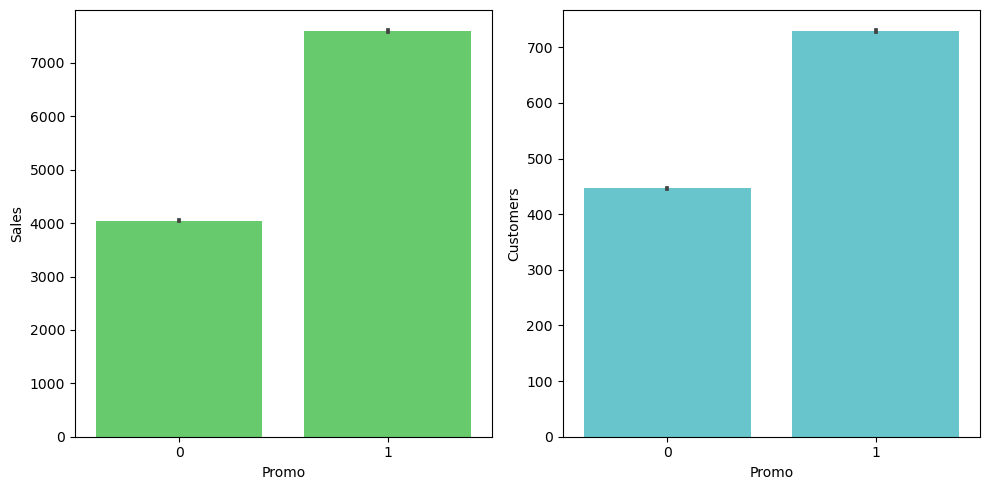

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='Promo',y='Sales', color=sns.color_palette('hls')[2])
plt.xlabel('Promo')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='Promo', y='Customers', color=sns.color_palette('hls')[3])
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.tight_layout()

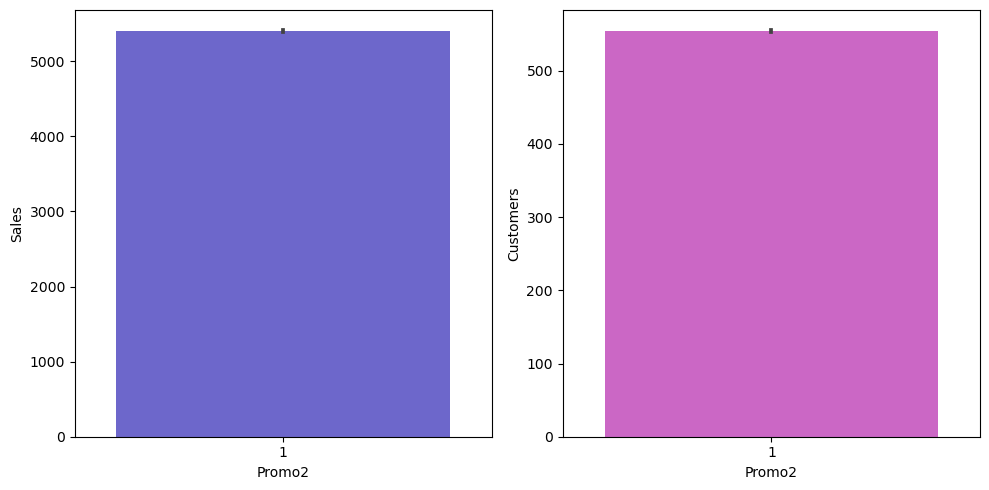

In [28]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='Promo2',y='Sales', color=sns.color_palette('hls')[4])
plt.xlabel('Promo2')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='Promo2', y='Customers', color=sns.color_palette('hls')[5])
plt.xlabel('Promo2')
plt.ylabel('Customers')
plt.tight_layout()

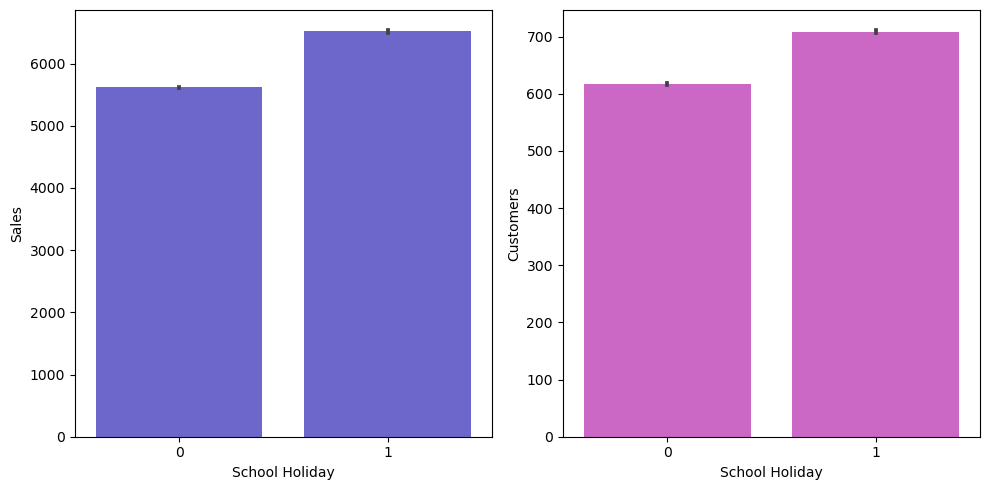

In [99]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='SchoolHoliday',y='Sales', color=sns.color_palette('hls')[0])
plt.xlabel('School Holiday')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='SchoolHoliday', y='Customers', color=sns.color_palette('hls')[1])
plt.xlabel('School Holiday')
plt.ylabel('Customers')
plt.tight_layout()

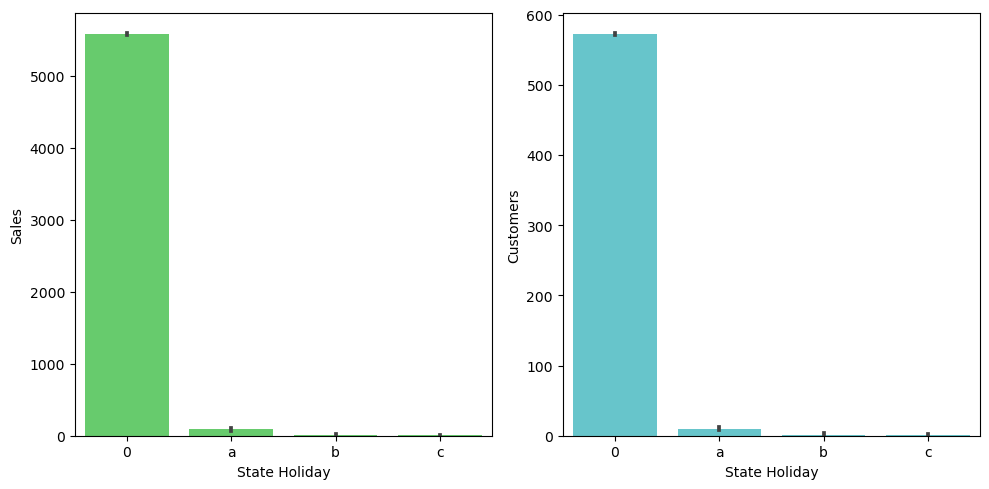

In [29]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_rossman, x='StateHoliday',y='Sales', color=sns.color_palette('hls')[2])
plt.xlabel('State Holiday')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=df_rossman,x='StateHoliday', y='Customers', color=sns.color_palette('hls')[3])
plt.xlabel('State Holiday')
plt.ylabel('Customers')
plt.tight_layout()

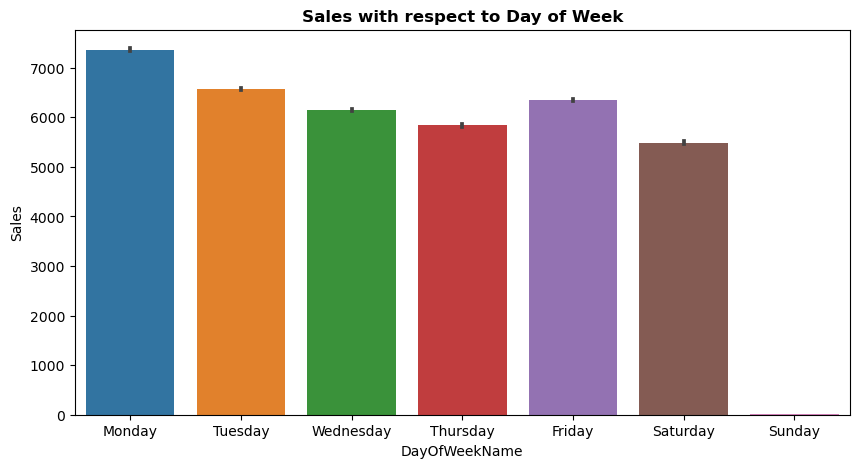

In [30]:
plt.figure(figsize=(10, 5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df_rossman, x='DayOfWeekName', y='Sales', order=order_days)
plt.ylabel('Sales')
plt.title('Sales with respect to Day of Week', fontweight='bold')
plt.show()

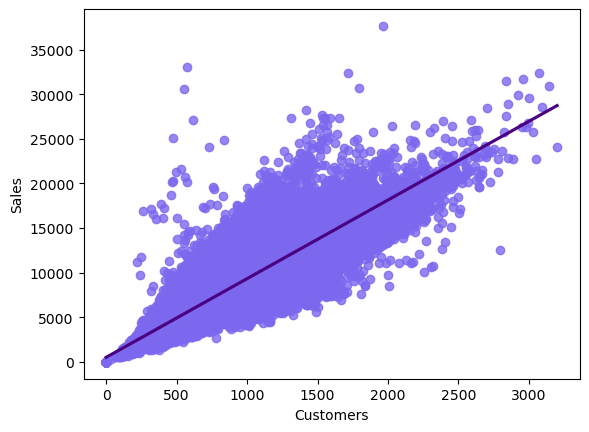

In [31]:
sns.regplot(x=df_rossman['Customers'], y=df_rossman['Sales'],color='mediumslateblue', line_kws={'color': 'indigo'});

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Customers')

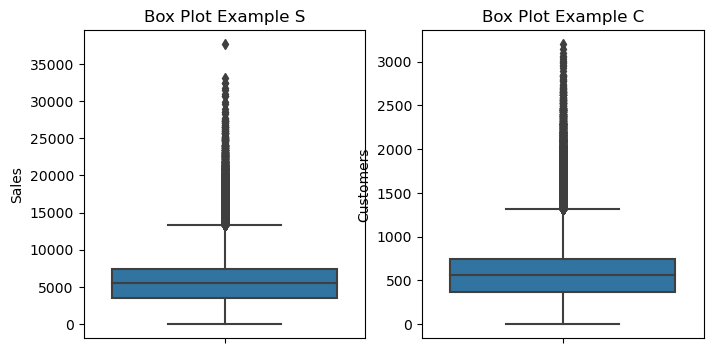

In [33]:
df = pd.DataFrame(df_rossman)

#make a box plot

plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Sales')
plt.title("Box Plot Example S")
plt.ylabel("Sales")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Customers')
plt.title("Box Plot Example C")
plt.ylabel("Customers")

In [ ]:
##cause there are too many outliers so we dont want to delete them

In [37]:
Rossmann_train_1 = df_rossman.set_index(pd.to_datetime(df_rossman["Date"]))


# Delete the column with our old string representation of times.
Rossmann_train_1 = Rossmann_train_1.drop(columns=["Date"])  

# Show the index and the dataframe.
print(Rossmann_train_1.index)
Rossmann_train_1

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=324326, freq=None)


,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName
Date,,,,,,,,,,,,,,,,,
2015-07-31,2,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday
2015-07-30,2,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Thursday
2015-07-29,2,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Wednesday
2015-07-28,2,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Tuesday
2015-07-27,2,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1111,3325,291,1,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Saturday
2013-01-04,1111,4640,453,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Friday
2013-01-03,1111,4579,444,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Thursday


In [39]:
Rossmann_train_1[["Sales","Customers"]]

,Sales,Customers
Date,,
2015-07-31,6064,625
2015-07-30,5567,601
2015-07-29,6402,727
2015-07-28,5671,646
2015-07-27,6627,638
...,...,...
2013-01-05,3325,291
2013-01-04,4640,453
2013-01-03,4579,444


In [53]:
# find NaN
missing_values = Rossmann_train_1[Rossmann_train_1.isna().any(axis=1)]
print(missing_values)
#we get Empty DataFrame so there is not NaN in 

Empty DataFrame
Columns: [Store, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeekName]
Index: []


<AxesSubplot:xlabel='Date'>

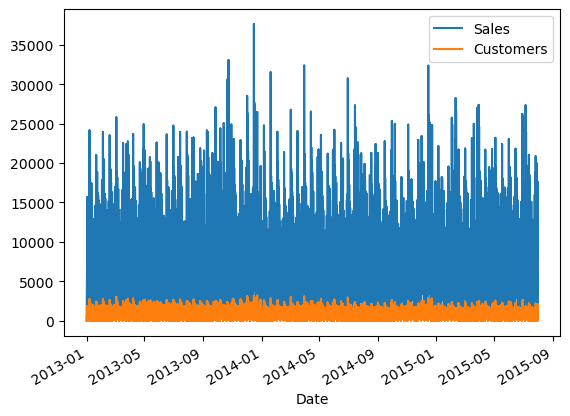

In [55]:
Rossmann_train_1[["Sales","Customers"]].plot.line()

<AxesSubplot:xlabel='Date'>

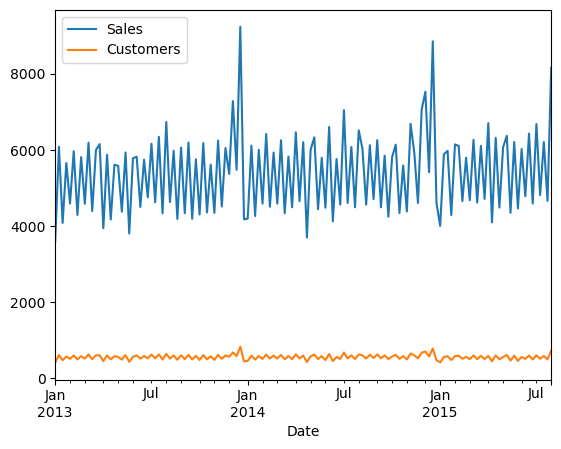

In [56]:
weekly_data = Rossmann_train_1.resample('W').mean()
weekly_data[["Sales","Customers"]].plot.line()

<AxesSubplot:xlabel='Date'>

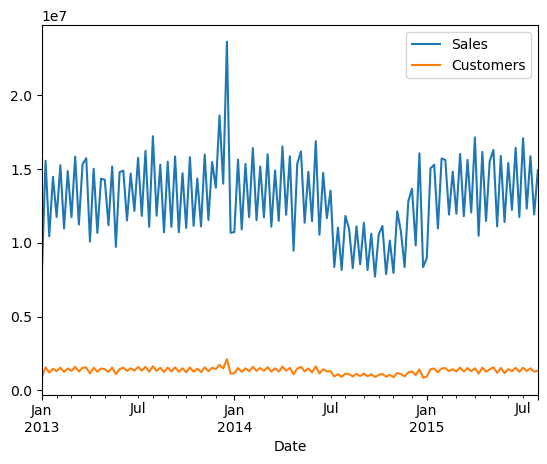

In [57]:
weekly_data = Rossmann_train_1.resample('W').sum()
weekly_data[["Sales","Customers"]].plot.line()

In [58]:
print(Rossmann_train_1.index.dtype)

datetime64[ns]


<AxesSubplot:xlabel='Date'>

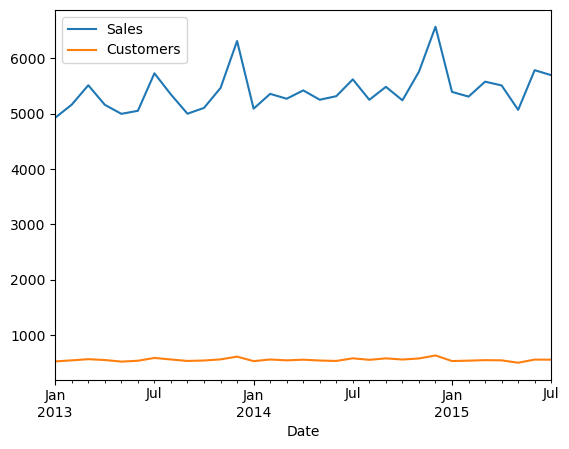

In [59]:
monthly_data = Rossmann_train_1.resample('M').mean()
monthly_data[["Sales","Customers"]].plot.line()

<AxesSubplot:xlabel='Date'>

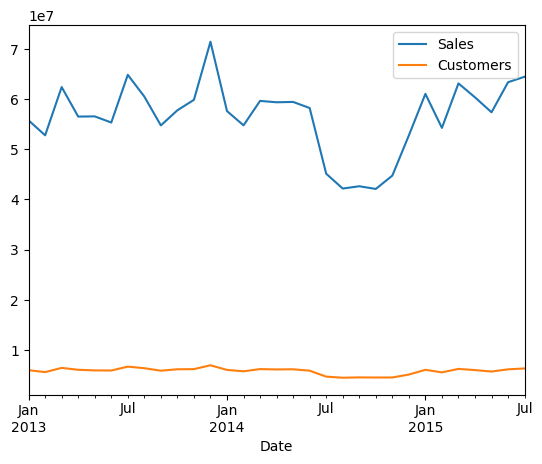

In [60]:
monthly_data = Rossmann_train_1.resample('M').sum()
monthly_data[["Sales","Customers"]].plot.line()

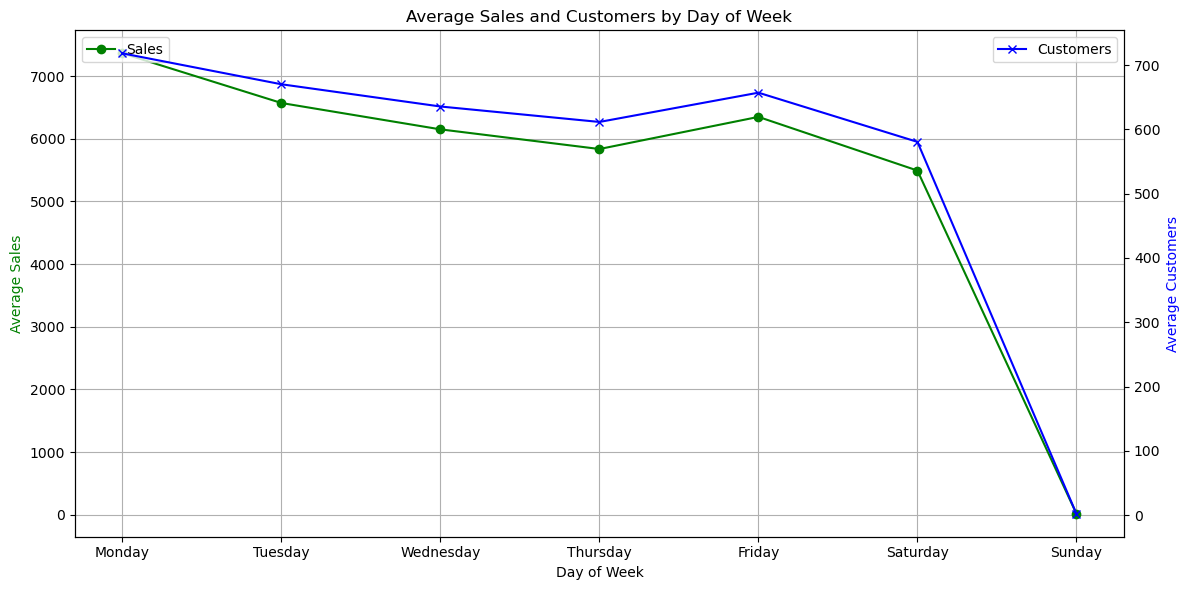

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


Rossmann_train_1.index = pd.to_datetime(Rossmann_train_1.index)


Rossmann_train_1['DayOfWeekName'] = Rossmann_train_1.index.day_name()


average_data = Rossmann_train_1.groupby('DayOfWeekName')[['Sales', 'Customers']].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
average_data['Sales'].plot(ax=ax1, kind='line', marker='o', color='g', label='Sales')
average_data['Customers'].plot(ax=ax2, kind='line', marker='x', color='b', label='Customers')

ax1.set_ylabel('Average Sales', color='g')
ax2.set_ylabel('Average Customers', color='b')
ax1.set_title('Average Sales and Customers by Day of Week')
ax1.set_xlabel('Day of Week')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

